<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Machine_Learning/automatic_machine_learning_r_ipynbl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Automatic Machine Learning (AutoML) in R**

Zia Ahmed, University at Buffalo, NY

Automatic Machine Learning, often abbreviated as AutoML, is a comprehensive approach to streamline and automate the process of building and deploying machine learning models. It aims to make machine learning more accessible to individuals and organizations with varying levels of expertise in data science and machine learning.

Key characteristics of Automatic Machine Learning include:

1. **Automation of Model Selection**: AutoML platforms automatically select the most appropriate machine learning algorithms and model architectures for a given dataset. This helps in eliminating the need for manual model selection, which can be a time-consuming and error-prone task.

2. **Hyperparameter Optimization**: AutoML tools search for the best hyperparameters for a chosen model, helping improve its performance. This involves tuning parameters like learning rates, batch sizes, and regularization terms to achieve optimal results.

3. **Feature Engineering**: AutoML can automate the process of feature selection and engineering, identifying relevant features from the dataset and transforming them to improve model accuracy.

4. **Data Preprocessing**: Automatic Machine Learning tools handle data preprocessing tasks, such as handling missing values, encoding categorical variables, and scaling numerical features, making the data ready for model training.

5. **Model Evaluation**: AutoML systems automatically evaluate and compare the performance of different models, using appropriate metrics like accuracy, precision, recall, and F1 score. This helps users identify the best model for their specific problem.

6. **AutoML Frameworks**: There are various AutoML frameworks and libraries available, both open-source and commercial, that enable users to implement automatic machine learning pipelines without extensive manual coding.

7. **Time and Resource Efficiency**: AutoML simplifies and accelerates the process of creating machine learning models, making it feasible to generate models more quickly and with fewer resources, thus reducing the barrier to entry for machine learning adoption.

8. **Customization and Expert Intervention**: While AutoML automates many aspects of model development, it often allows experts to fine-tune the process or make manual adjustments when necessary, striking a balance between automation and human expertise.

9. **Scalability**: AutoML can be scaled to work with large datasets and complex problems, making it a valuable tool for organizations dealing with big data.

AutoML is particularly valuable in democratizing machine learning, enabling businesses and individuals without extensive machine learning expertise to leverage the power of data-driven insights and predictive modeling. It is commonly used in a wide range of applications, including image and speech recognition, natural language processing, predictive analytics, and more.

H2O's AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit.

H2O offers a number of model explainability methods that apply to AutoML objects (groups of models), as well as individual models (e.g. leader model). Explanations can be generated automatically with a single function call, providing a simple interface to exploring and explaining the AutoML models.

In this excercise we will cover:

1. [AutoML with H2O](#automl-with-h2o)

2. [AutoML H2O with tidymodel](automl-tidymodel)


### Install rpy2



In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp310-cp310-linux_x86_64.whl


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Check and Install Required R Packages

In [ ]:
%%R
pkg <- c('tidyverse','tidymodels', 'gridExtra', 'devtools', 'data.table', 'Hmisc','corrplot',
        'ggpmisc', 'plyr', 'Metrics','patchwork' )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Install H2O

In [ ]:
%%R
pkgs <- c("RCurl","jsonlite")
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages(lib='drive/My Drive/R/')))) { install.packages(pkg) }
}
install.packages("h2o", type="source",lib='drive/My Drive/R/', repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))

In [ ]:
%%R
install.packages("agua", type="source",lib='drive/My Drive/R/')

### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(tidymodels)
library(Metrics)
library(ggpmisc)
library(vip)
library(gridExtra)
library(agua)

### Data

The data use in this excersise could be found in my [Dropbox](https://www.dropbox.com/scl/fo/6cswerwra1k7qs6fzxieq/h?rlkey=6kqt1ztnkgrdt7cjmaqfkd7fd&dl=0) or [Github](https://github.com/zia207/r-colab/tree/main/Data/Machine_Learning) folder. Or you can load in directly in R using following comand.  

In [129]:
%%R
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/Machine_Learning/GP_all_data.csv"
mf<-read_csv(url(urlfile))
#mf<-read_csv("/content/drive/MyDrive/R_Website/Machine_Learning/Data/gp_soil_data_syn.csv")

Rows: 471 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD_DES, FRG_DES
dbl (17): ID, STATE_ID, FIPS, x, y, SOC, ELEV, Aspect, Slope, TPI, K_Factor,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
# Create a data-frame
df<-mf %>% dplyr::select(SOC, ELEV, Slope, Aspect, TPI, K_Factor, Silt_Clay, MAT, MAP,NDVI, NLCD, FRG)%>%
    glimpse()

Rows: 471
Columns: 12
$ SOC       <dbl> 7.256, 4.594, 5.995, 11.220, 5.388, 1.619, 3.842, 10.276, 0.…
$ ELEV      <dbl> 272.6797, 2261.7820, 2404.1121, 2281.4246, 277.6634, 2317.49…
$ Slope     <dbl> 1.429968, 4.874323, 6.680480, 7.745950, 2.923675, 2.635038, …
$ Aspect    <dbl> 185.0404, 222.3785, 183.5729, 173.1285, 168.1043, 193.8056, …
$ TPI       <dbl> 1.0744587, -1.4409482, 7.7656183, -3.2823703, -0.4226714, -1…
$ K_Factor  <dbl> 0.3255294, 0.2486000, 0.0590000, 0.2847475, 0.3750685, 0.249…
$ Silt_Clay <dbl> 77.16470, 40.66200, 53.73600, 46.83738, 62.83973, 38.42100, …
$ MAT       <dbl> 13.748117, 8.162200, 6.890750, 8.533788, 14.152466, 8.189600…
$ MAP       <dbl> 1099.3408, 410.5008, 568.7746, 391.4978, 1013.7034, 368.2008…
$ NDVI      <dbl> 0.6943141, 0.3705533, 0.6434158, 0.3530265, 0.7292835, 0.283…
$ NLCD      <dbl> 7, 4, 4, 4, 6, 5, 4, 4, 5, 4, 4, 6, 4, 4, 4, 5, 4, 5, 4, 5, …
$ FRG       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, …


### Data Preprocessing

#### Convert to factor

In [ ]:
%%R
df$NLCD <- as.factor(df$NLCD)
df$FRG <- as.factor(df$FRG)

#### Data Split

In [ ]:
%%R
set.seed(1245)   # for reproducibility
split_01 <- initial_split(df, prop = 0.8, strata = SOC)
train <- split_01 %>% training()
test <-  split_01 %>% testing()

In [ ]:
%%R
head(test)

# A tibble: 6 × 12
    SOC  ELEV Slope Aspect      TPI K_Factor Silt_Clay   MAT   MAP  NDVI NLCD 
  <dbl> <dbl> <dbl>  <dbl>    <dbl>    <dbl>     <dbl> <dbl> <dbl> <dbl> <fct>
1 6.00  2404.  6.68   184.  7.77       0.059      53.7  6.89  569. 0.643 4    
2 7.60  2515.  6.60   165.  2.94       0.235      54.6  7.41  531. 0.537 4    
3 3.78  2328. 10.5    220.  0.551      0.117      53.3  7.08  509. 0.574 4    
4 6.5   1486.  1.62   141. -0.579      0.320      48.0  6.98  325. 0.322 5    
5 0.471 1258.  2.61   154. -0.00829    0.208      61.9 14.7   347. 0.210 5    
6 9.45  1691.  3.97   141.  1.78       0.313      40.1  7.47  353. 0.362 6    
# ℹ 1 more variable: FRG <fct>


#### Data Scaling

In [ ]:
%%R
train[-c(1,11,12)] = scale(train[-c(1,11,12)])
test[-c(1,11,12)] = scale(test[-c(1,11,12)])

<a name="automl-with-h2o"></a>
## **AutoML with H2O**

H2O AutoML is designed to simplify and automate the machine learning model development process, making it accessible to a wide range of users, including data scientists, analysts, and domain experts.

H2O AutoML Trains and tunes several ML models, such as a generalized linear model (GLM), distributed random forest (DRF), extremely randomized tree (XRT), gradient boosting machine (GBM), extreme gradient boosting machine (XGBoost), and deep neural network (DNN). The GLM, DRF, and XRT are trained with pre-specified hyperparameter tuning settings. GBM, XGboost, and DNN are trained with pre-specified and random grid search with all possible hyperparameter combinations. The cross-validation predicted outputs of all based models are then trained with two stacked ensemble models at the end. One ensemble contains all randommodels, and the other includes just the best-performing model from each algorithm class.

H2O offers several model explainability methods that apply to AutoML objects (groups of models), as well as individual models (e.g., leader model). Explanations can be generated automatically with a single function call, providing a simple interface for exploring and explaining the AutoML models.

#### **Required Data Parameters**

-   [y](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/y.html): This argument is the name (or index) of the response column.

-   [training_frame](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/training_frame.html): Specifies the training set.

#### **Required Stopping Parameters**

One of the following stopping strategies (time or number-of-model based) must be specified. When both options are set, then the AutoML run will stop as soon as it hits one of either When both options are set, then the AutoML run will stop as soon as it hits either of these limits.

-   [max_runtime_secs](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs.html): This argument specifies the maximum time that the AutoML process will run for. The default is 0 (no limit), but dynamically sets to 1 hour if none of `max_runtime_secs` and `max_models` are specified by the user.

-   [max_models](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_models.html): Specify the maximum number of models to build in an AutoML run, excluding the Stacked Ensemble models. Defaults to `NULL/None`. Always set this parameter to ensure AutoML reproducibility: all models are then trained until convergence and none is constrained by a time budget.

### Import h20

In [ ]:
%%R
library(h2o)
h2o.init()
#disable progress bar for RMarkdown
h2o.no_progress()
# Optional: remove anything from previous session
h2o.removeAll()

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 hours 39 minutes 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.42.0.2 
    H2O cluster version age:    3 months 
    H2O cluster name:           H2O_started_from_R_root_yqz807 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.05 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.3.1 (2023-06-16) 



### Import data to h2o cluster

In [ ]:
%%R
h_df=as.h2o(df)
h_train = as.h2o(train)
h_test = as.h2o(test)

#### Define response and predictors

In [ ]:
%%R
y <- "SOC"
x <- setdiff(names(h_df), y)

### Fit AutoML

In [ ]:
%%R
df.aml <- h2o.automl(
                  x= x,
                  y = y,
                  training_frame = h_df,
                  nfolds=5,
                  keep_cross_validation_predictions = TRUE,
                  stopping_metric = "RMSE",
                  stopping_tolerance = 0.001,
                  stopping_rounds = 3,
                  max_runtime_secs_per_model = 1,
                  seed = 42,
                  max_models = 100,
                  project_name = "AutoML_trainings")
df.aml


16:46:06.879: Stopping tolerance set by the user is < 70% of the recommended default of 0.04607756775840914, so models may take a long time to converge or may not converge at all.AutoML Details
Project Name: AutoML_trainings 
Leader Model ID: StackedEnsemble_BestOfFamily_1_AutoML_2_20231025_164606 
Algorithm: stackedensemble 

Total Number of Models Trained: 102 
Start Time: 2023-10-25 16:46:07 UTC 
End Time: 2023-10-25 16:48:39 UTC 
Duration: 152 s

Leaderboard
                                                  model_id     rmse      mse
1  StackedEnsemble_BestOfFamily_1_AutoML_2_20231025_164606 3.739228 13.98183
2                           XRT_1_AutoML_2_20231025_164606 3.777059 14.26617
3     DeepLearning_grid_2_AutoML_2_20231025_164606_model_8 3.791571 14.37601
4                           DRF_1_AutoML_2_20231025_164606 3.792062 14.37974
5                           GBM_1_AutoML_2_20231025_164606 3.797131 14.41820
6     StackedEnsemble_AllModels_1_AutoML_2_20231025_164606 3.810940 14

###   Leaderboard

In [ ]:
%%R
lb <- h2o.get_leaderboard(object = df.aml, extra_columns = "ALL")
head(lb)


                                                 model_id     rmse      mse
1 StackedEnsemble_BestOfFamily_1_AutoML_2_20231025_164606 3.739228 13.98183
2                          XRT_1_AutoML_2_20231025_164606 3.777059 14.26617
3    DeepLearning_grid_2_AutoML_2_20231025_164606_model_8 3.791571 14.37601
4                          DRF_1_AutoML_2_20231025_164606 3.792062 14.37974
5                          GBM_1_AutoML_2_20231025_164606 3.797131 14.41820
6    StackedEnsemble_AllModels_1_AutoML_2_20231025_164606 3.810940 14.52326
       mae     rmsle mean_residual_deviance training_time_ms
1 2.674220 0.4975887               13.98183              554
2 2.719768 0.5058808               14.26617              492
3 2.763821 0.5252476               14.37601               62
4 2.719822 0.5069439               14.37974              597
5 2.729207 0.5153870               14.41820              178
6 2.694820 0.4992768               14.52326             1731
  predict_time_per_row_ms            algo

### The best model

In [ ]:
%%R
best_ML<- h2o.get_best_model(df.aml, criterion = "RMSE" )
best_ML

Model Details:

H2ORegressionModel: stackedensemble
Model ID:  StackedEnsemble_BestOfFamily_1_AutoML_2_20231025_164606 
Model Summary for Stacked Ensemble: 
                                         key            value
1                          Stacking strategy cross_validation
2       Number of base models (used / total)              5/6
3           # GBM base models (used / total)              1/1
4       # XGBoost base models (used / total)              1/1
5           # DRF base models (used / total)              2/2
6  # DeepLearning base models (used / total)              1/1
7           # GLM base models (used / total)              0/1
8                      Metalearner algorithm              GLM
9         Metalearner fold assignment scheme           Random
10                        Metalearner nfolds                5
11                   Metalearner fold_column               NA
12        Custom metalearner hyperparameters             None


H2ORegressionMetrics: stackedensemb

### The best stack ensemble model (stacking of all models)

In [ ]:
%%R
model_ids<-as.data.frame(lb)$model_id
stack_all<-h2o.getModel(grep("StackedEnsemble_AllModels", model_ids, value=TRUE)[1])
stack_all_metalearner_model<-stack_all@model$metalearner_model
stack_all_metalearner_model

Model Details:

H2ORegressionModel: glm
Model ID:  metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_2_20231025_164606 
GLM Model: summary
    family     link                              regularization
1 gaussian identity Elastic Net (alpha = 0.5, lambda = 0.6628 )
                                                                 lambda_search
1 nlambda = 100, lambda.max = 26.143, lambda.min = 0.6628, lambda.1se = 6.1815
  number_of_predictors_total number_of_active_predictors number_of_iterations
1                        100                          14                   80
                                                          training_frame
1 levelone_training_StackedEnsemble_AllModels_1_AutoML_2_20231025_164606

Coefficients: glm coefficients
                                                 names coefficients
1                                            Intercept    -0.392725
2                       XRT_1_AutoML_2_20231025_164606     0.075003
3 DeepLearning_grid_2_AutoML_2_2023

### The best stack ensemble (stacking best of family)

In [ ]:
%%R
stack_best<-h2o.getModel(grep("StackedEnsemble_BestOfFamily", model_ids, value=TRUE)[1])
stack_best_metalearner_model<-stack_best@model$metalearner_model
stack_best_metalearner_model

Model Details:

H2ORegressionModel: glm
Model ID:  metalearner_AUTO_StackedEnsemble_BestOfFamily_1_AutoML_2_20231025_164606 
GLM Model: summary
    family     link                              regularization
1 gaussian identity Elastic Net (alpha = 0.5, lambda = 0.5618 )
                                                                 lambda_search
1 nlambda = 100, lambda.max = 23.214, lambda.min = 0.5618, lambda.1se = 5.7504
  number_of_predictors_total number_of_active_predictors number_of_iterations
1                          6                           5                   41
                                                             training_frame
1 levelone_training_StackedEnsemble_BestOfFamily_1_AutoML_2_20231025_164606

Coefficients: glm coefficients
                                                 names coefficients
1                                            Intercept    -0.297412
2                       XRT_1_AutoML_2_20231025_164606     0.227178
3 DeepLearning_grid_2_Auto

### The best GLM

In [ ]:
%%R
best_GLM <- h2o.get_best_model(df.aml, algorithm = "glm", criterion = "RMSE" )
best_GLM

Model Details:

H2ORegressionModel: glm
Model ID:  GLM_1_AutoML_2_20231025_164606 
GLM Model: summary
    family     link             regularization
1 gaussian identity Ridge ( lambda = 0.09057 )
                                                                lambda_search
1 nlambda = 30, lambda.max = 298.02, lambda.min = 0.09057, lambda.1se = 0.609
  number_of_predictors_total number_of_active_predictors number_of_iterations
1                         19                          19                   18
                                     training_frame
1 AutoML_2_20231025_164606_training_df_sid_875d_370

Coefficients: glm coefficients
       names coefficients standardized_coefficients
1  Intercept    -1.400130                  5.991323
2      FRG.1    -0.506858                 -0.506858
3    FRG.133    -0.043225                 -0.043225
4      FRG.2     0.681809                  0.681809
5      FRG.3     0.030380                  0.030380
6      FRG.4    -0.169983                 -0

### The best DRF model

In [ ]:
%%R
best_DRF <- h2o.get_best_model(df.aml, algorithm = "DRF", criterion = "RMSE" )
best_DRF

Model Details:

H2ORegressionModel: drf
Model ID:  XRT_1_AutoML_2_20231025_164606 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1              46                       46              172260        15
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        20   18.56522        269        318   293.30435


H2ORegressionMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  14.94379
RMSE:  3.86572
MAE:  2.756756
RMSLE:  0.5132346
Mean Residual Deviance :  14.94379



H2ORegressionMetrics: drf
** Reported on cross-validation data. **
** 5-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  14.26617
RMSE:  3.777059
MAE:  2.719768
RMSLE:  0.5058808
Mean Residual Deviance :  14.26617


Cross-Validation Metrics Summary: 
                            mean       sd cv_1_valid cv_2_valid cv_3_valid
mae                     2.719743 0.140164   2.

### The best XRT model

In [ ]:
%%R
best_XRT<-h2o.getModel(grep("XRT", model_ids, value=TRUE)[1])
best_XRT

Model Details:

H2ORegressionModel: drf
Model ID:  XRT_1_AutoML_2_20231025_164606 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1              46                       46              172260        15
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        20   18.56522        269        318   293.30435


H2ORegressionMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  14.94379
RMSE:  3.86572
MAE:  2.756756
RMSLE:  0.5132346
Mean Residual Deviance :  14.94379



H2ORegressionMetrics: drf
** Reported on cross-validation data. **
** 5-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  14.26617
RMSE:  3.777059
MAE:  2.719768
RMSLE:  0.5058808
Mean Residual Deviance :  14.26617


Cross-Validation Metrics Summary: 
                            mean       sd cv_1_valid cv_2_valid cv_3_valid
mae                     2.719743 0.140164   2.

### The best GBM model

In [ ]:
%%R
best_GBM <- h2o.get_best_model(df.aml, algorithm = "GBM", criterion = "RMSE" )
best_GBM

Model Details:

H2ORegressionModel: gbm
Model ID:  GBM_1_AutoML_2_20231025_164606 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1             100                      100                9621         1
  max_depth mean_depth min_leaves max_leaves mean_leaves
1         3    1.97000          2          4     2.97000


H2ORegressionMetrics: gbm
** Reported on training data. **

MSE:  11.81902
RMSE:  3.43788
MAE:  2.458143
RMSLE:  0.4666737
Mean Residual Deviance :  11.81902



H2ORegressionMetrics: gbm
** Reported on cross-validation data. **
** 5-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  14.4182
RMSE:  3.797131
MAE:  2.729207
RMSLE:  0.515387
Mean Residual Deviance :  14.4182


Cross-Validation Metrics Summary: 
                            mean       sd cv_1_valid cv_2_valid cv_3_valid
mae                     2.734789 0.163357   2.730334   2.840403   2.513620
mean_residual_deviance 14.45

### The best XGBoost model

In [ ]:
%%R
best_XGBoost <- h2o.get_best_model(df.aml, algorithm = "xgboost", criterion = "RMSE" )
best_XGBoost

Model Details:

H2ORegressionModel: xgboost
Model ID:  XGBoost_grid_1_AutoML_2_20231025_164606_model_20 
Model Summary: 
  number_of_trees
1              18


H2ORegressionMetrics: xgboost
** Reported on training data. **

MSE:  11.51745
RMSE:  3.393737
MAE:  2.240734
RMSLE:  0.4211417
Mean Residual Deviance :  11.51745



H2ORegressionMetrics: xgboost
** Reported on cross-validation data. **
** 5-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  15.16229
RMSE:  3.893879
MAE:  2.734558
RMSLE:  0.5069811
Mean Residual Deviance :  15.16229


Cross-Validation Metrics Summary: 
                            mean       sd cv_1_valid cv_2_valid cv_3_valid
mae                     2.734311 0.215721   2.850803   2.774088   2.436931
mean_residual_deviance 15.162397 3.293906  15.112313  16.368399  10.131986
mse                    15.162397 3.293906  15.112313  16.368399  10.131986
r2                      0.395776 0.043408   0.424415   0.353821   0.

### The best DNN model

In [ ]:
%%R
best_DNN <- h2o.get_best_model(df.aml, algorithm = "DeepLearning", criterion = "RMSE" )
best_DNN

Model Details:

H2ORegressionModel: deeplearning
Model ID:  DeepLearning_grid_2_AutoML_2_20231025_164606_model_8 
Status of Neuron Layers: predicting SOC, regression, gaussian distribution, Quadratic loss, 881 weights/biases, 15.3 KB, 4,130 training samples, mini-batch size 1
  layer units             type dropout       l1       l2 mean_rate rate_rms
1     1    21            Input 10.00 %       NA       NA        NA       NA
2     2    20 RectifierDropout 10.00 % 0.000000 0.000000  0.100234 0.293669
3     3    20 RectifierDropout 10.00 % 0.000000 0.000000  0.012263 0.032496
4     4     1           Linear      NA 0.000000 0.000000  0.000653 0.000237
  momentum mean_weight weight_rms mean_bias bias_rms
1       NA          NA         NA        NA       NA
2 0.000000    0.001088   0.215192  0.442297 0.127000
3 0.000000   -0.023068   0.216285  0.946807 0.051494
4 0.000000   -0.050196   0.228585  0.040816 0.000000


H2ORegressionMetrics: deeplearning
** Reported on training data. **
** Metri

### Cross-validation Results

In [ ]:
%%R
# Stack Ensemble of all model
cv.stack_all<-stack_all_metalearner_model@model$cross_validation_metrics_summary

# Stack Ensemble the best of family
cv.stack_best<-stack_best_metalearner_model@model$cross_validation_metrics_summary

# GLM
cv.GLM<-best_GLM@model$cross_validation_metrics_summary

# DRF
cv.DRF<-best_DRF@model$cross_validation_metrics_summary

# XRT
cv.XRT<-best_XRT@model$cross_validation_metrics_summary

# GBM
cv.GBM<-best_GBM@model$cross_validation_metrics_summary

# XGBoost
cv.XGBoost<-best_XGBoost@model$cross_validation_metrics_summary

# DNN
cv.DNN<-best_DNN@model$cross_validation_metrics_summary


### CV- RMSE

In [ ]:
%%R
glm.rmse<-cv.GLM[7,c(1:2)]
drf.rmse<-cv.DRF[6,c(1:2)]
xrt.rmse<-cv.XRT[6,c(1:2)]
gbm.rmse<-cv.GBM[6,c(1:2)]
xgboost.rmse<-cv.XGBoost[6,c(1:2)]
dnn.rmse<-cv.DNN[6,c(1:2)]
stack_all.rmse<-cv.stack_all[7,c(1:2)]
stack_best.rmse<-cv.stack_best[7,c(1:2)]
# complie result
cv.rmse<-rbind(glm.rmse,
              drf.rmse,
              xrt.rmse,
              gbm.rmse,
              xgboost.rmse,
              dnn.rmse,
              stack_all.rmse,
              stack_best.rmse)
# define column name
rownames(cv.rmse) <- c("GLM ",
                      "DRF ",
                      "XRT",
                      "GBM",
                      "XGBoost",
                      "DNN",
                      "Stack-Ensemble (all models)",
                      "Stack-Ensemble (the best of family)")
cv.rmse <- tibble::rownames_to_column(cv.rmse, "Models")
cv.rmse <-arrange(cv.rmse ,desc(mean))
cv.rmse


                               Models     mean        sd
1                                 DNN 4.160530 0.5132146
2                             XGBoost 3.874089 0.4385125
3                                GLM  3.792193 0.3695858
4                                 GBM 3.791065 0.3132265
5                                DRF  3.763852 0.3514410
6                                 XRT 3.763852 0.3514410
7 Stack-Ensemble (the best of family) 3.703715 0.5030395
8         Stack-Ensemble (all models) 3.689648 0.2899665


### R-squared CV

In [ ]:
%%R
# Get R2
glm.R2<-cv.GLM[5,c(1:2)]
drf.R2<-cv.DRF[4,c(1:2)]
xrt.R2<-cv.XRT[4,c(1:2)]
gbm.R2<-cv.GBM[4,c(1:2)]
xgboost.R2<-cv.XGBoost[4,c(1:2)]
dnn.R2<-cv.DNN[4,c(1:2)]
stack_all.R2<-cv.stack_all[5,c(1:2)]
stack_best.R2<-cv.stack_best[5,c(1:2)]
# complie result
cv.R2<-rbind(glm.R2,
              drf.R2,
              xrt.R2,
              gbm.R2,
              xgboost.R2,
              dnn.R2,
              stack_all.R2,
              stack_best.R2)
# define column name
rownames(cv.R2) <- c("GLM ",
                      "DRF ",
                      "XRT",
                      "GBM",
                      "XGBoost",
                      "DNN",
                      "Stack-Ensemble (all models)",
                      "Stack-Ensemble (the best of family)")
cv.R2 <- tibble::rownames_to_column(cv.R2, "Models")
cv.R2 <-arrange(cv.R2 ,desc(mean))
cv.R2

                               Models      mean         sd
1 Stack-Ensemble (the best of family) 0.4543096 0.04016690
2         Stack-Ensemble (all models) 0.4444591 0.10145306
3                                DRF  0.4264789 0.05792372
4                                 XRT 0.4264789 0.05792372
5                                 GBM 0.4159715 0.07358947
6                                GLM  0.4148099 0.08974444
7                             XGBoost 0.3957756 0.04340805
8                                 DNN 0.2972505 0.12110819


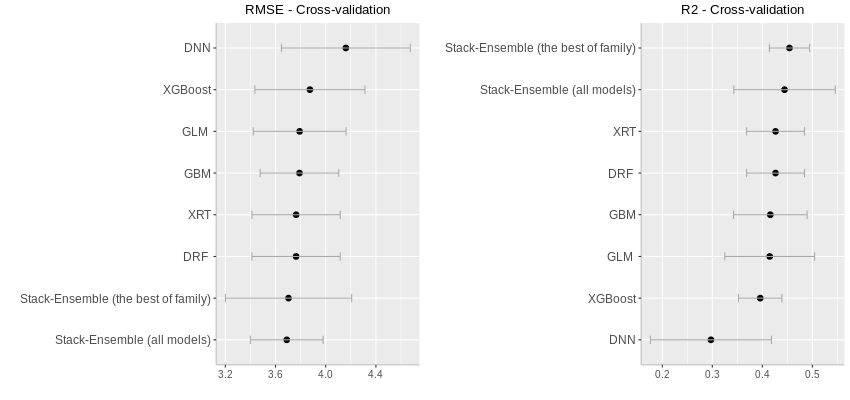

In [ ]:
%%R  -w 850 -h 400 -u px

# RMSE
cv.p1<-ggplot(cv.rmse, aes(y=mean, x=reorder(Models, +mean))) +
  ylab('') +
  xlab('')+
  geom_point(colour = "black", size = 2.5)+
  geom_errorbar(aes(ymin=mean-sd,
                    ymax=mean+sd),
                    width=.2,
                    linetype=1,
                    color ="dark grey") +
   theme(axis.line = element_line(colour = "grey"),
        axis.text.y=element_text(size=12),
        axis.text.x = element_text(size=10),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12))+
        ggtitle("RMSE - Cross-validation") +
        theme(plot.title = element_text(hjust = 0.5))+
  coord_flip()

# R2
cv.p2<-ggplot(cv.R2, aes(y=mean, x=reorder(Models, +mean))) +
  ylab('') +
  xlab('')+
  geom_point(colour = "black", size = 2.5)+
  geom_errorbar(aes(ymin=mean-sd,
                    ymax=mean+sd),
                    width=.2,
                    linetype=1,
                    color ="dark grey") +
   theme(axis.line = element_line(colour = "grey"),
        axis.text.y=element_text(size=12),
        axis.text.x = element_text(size=10),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12))+
        ggtitle("R2 - Cross-validation") +
        theme(plot.title = element_text(hjust = 0.5))+
  coord_flip()

grid.arrange(cv.p1, cv.p2,ncol = 2)  # Multiplot

### Prediction at test data (best ML)

In [ ]:
%%R
best.test<-h2o.performance(best_ML, h_test)
best.test

H2ORegressionMetrics: stackedensemble

MSE:  22.28106
RMSE:  4.720282
MAE:  3.03966
RMSLE:  0.5141931
Mean Residual Deviance :  22.28106



In [ ]:
%%R
test.xy<-test %>% dplyr::select(x, y, SOC)
best.ML<-as.data.frame(h2o.predict(object = best_ML, newdata = h_test))
test.xy$Pred_SOC<-best.ML$predict

In [ ]:
%%R
RMSE<- Metrics::rmse(test.xy$SOC, test.xy$Pred_SOC)
MAE<- Metrics::mae(test.xy$SOC, test.xy$Pred_SOC)

# Print results
paste0("RMSE: ", round(RMSE,2))
paste0("MAE: ", round(MAE,2))


[1] "MAE: 3.04"


`geom_smooth()` using formula = 'y ~ x'


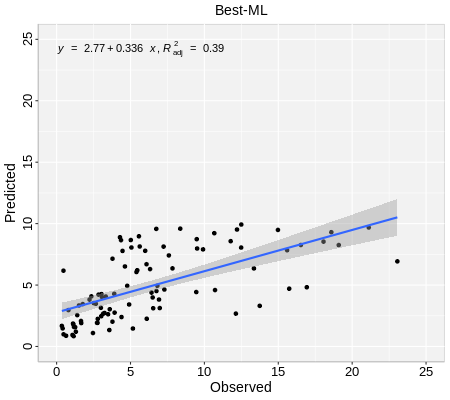

In [147]:
%%R -w 450 -h 400 -u px

formula<-y~x
ggplot(test.xy, aes(SOC,Pred_SOC)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Best-ML") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

<a name="automl-tidymodel"></a>
## **AutoML H2O with tidymodel**

utoML could be particularly insightful as an exploratory approach to identify model families and parameterization that is most likely to succeed. You can use H2O’s AutoML algorithm via the 'h2o' engine in **auto_ml()**. R package **agua** provides several helper functions to quickly wrangle and visualize H2O AutoML’s results.

The agua package provides tidymodels interface to the H2O platform and the h2o R package. It has two main components

* new parsnip engine 'h2o' for the following models:

* linear_reg(), logistic_reg(), poisson_reg(), multinom_reg(): All fit penalized generalized linear models. If the model parameters penalty and mixture are not specified, h2o will internally search for the optimal regularization settings.

* boost_tree(): . Fits boosted trees via xgboost. Use h2o::h2o.xgboost.available() to see if h2o’s xgboost is supported on your machine. For classical gradient boosting, use the 'h2o_gbm' engine.

* rand_forest(): Random forest models.

* naive_Bayes(): Naive Bayes models.

* rule_fit(): RuleFit models.

* mlp(): Multi-layer feedforward neural networks.

* auto_ml(): Automatic machine learning.

#### Data

In [130]:
%%R
# Import data
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/Machine_Learning/GP_all_data.csv"
mf<-read_csv(url(urlfile))

# Create a data-frame
df<-mf %>% dplyr::select(SOC, ELEV, Slope, Aspect, TPI, K_Factor, Silt_Clay, MAT, MAP,NDVI, NLCD, FRG)%>%
    glimpse()

# convet factor
df$NLCD <- as.factor(df$NLCD)
df$FRG <- as.factor(df$FRG)

# Split data
set.seed(1245)   # for reproducibility
split <- initial_split(df, prop = 0.8, strata = SOC)
train <- split %>% training()
test <-  split %>% testing()
# Set 10 fold cross-validation data set
cv_folds <- vfold_cv(train, v = 5)


Rows: 471 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD_DES, FRG_DES
dbl (17): ID, STATE_ID, FIPS, x, y, SOC, ELEV, Aspect, Slope, TPI, K_Factor,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 471
Columns: 12
$ SOC       <dbl> 7.256, 4.594, 5.995, 11.220, 5.388, 1.619, 3.842, 10.276, 0.…
$ ELEV      <dbl> 272.6797, 2261.7820, 2404.1121, 2281.4246, 277.6634, 2317.49…
$ Slope     <dbl> 1.429968, 4.874323, 6.680480, 7.745950, 2.923675, 2.635038, …
$ Aspect    <dbl> 185.0404, 222.3785, 183.5729, 173.1285, 168.1043, 193.8056, …
$ TPI       <dbl> 1.0744587, -1.4409482, 7.7656183, -3.2823703, -0.4226714, -1…
$ K_Factor  <dbl> 0.3255294, 0.2486000, 0.0590000, 0.2847475, 0.3750685, 0.249…
$ Silt_Clay <dbl> 77.16470, 40.66200, 53.73600, 46.83738, 62.83973, 38.42100, …
$ MAT       <dbl> 13.7

### Create a recipe

In [133]:
%%R
auto_recipe <-
  recipe(SOC ~ ., data = train) %>%
  step_zv(all_predictors()) %>%
  step_dummy(all_nominal()) %>%
  step_normalize(all_numeric_predictors())

### H20 model specification

In [137]:
%%R
auto_spec <-
  auto_ml() %>%
  set_engine("h2o", max_runtime_secs = 900, seed = 45) %>%
  set_mode("regression")

### AutoML workflow

In [138]:
%%R
auto_wflow <-
  workflow() %>%
  add_model(auto_spec) %>%
  add_recipe(auto_recipe)

### Fit AutoML

In [139]:
%%R
auto_fit <- fit(auto_wflow,
                data = train)

### Create a [parsnip](https://hardhat.tidymodels.org/reference/hardhat-extract.html) model object

**extract_fit_parsnip()** returns a parsnip model fit

In [140]:
%%R
extract_fit_parsnip(auto_fit)

parsnip model object

════════════════════════ H2O AutoML Summary: 106 models ════════════════════════ 
Leader Algorithm: gbm
 
Leader ID: GBM_grid_1_AutoML_4_20231025_173205_model_30
 
══════════════════════════════════ Leaderboard ═════════════════════════════════ 
                                                 model_id     rmse      mse
1            GBM_grid_1_AutoML_4_20231025_173205_model_30 3.718464 13.82697
2                          DRF_1_AutoML_4_20231025_173205 3.720092 13.83909
3 StackedEnsemble_BestOfFamily_6_AutoML_4_20231025_173205 3.735362 13.95293
4                          GBM_5_AutoML_4_20231025_173205 3.736400 13.96068
5            GBM_grid_1_AutoML_4_20231025_173205_model_12 3.740310 13.98992
6            GBM_grid_1_AutoML_4_20231025_173205_model_11 3.747182 14.04137
       mae     rmsle mean_residual_deviance
1 2.618423 0.5090533               13.82697
2 2.652222 0.5199565               13.83909
3 2.660338       NaN               13.95293
4 2.647941 0.5122655    

### Rank results

**rank_results(**) returns the leaderboard in a tidy format with rankings within each metric. A low rank means good performance in a metric. Here, the top 5 models with the smallest MAE includes are four stacked ensembles and one GBM model.

In [141]:
%%R
rank_results(auto_fit) %>%
  filter(.metric == "rmse") %>%
  arrange(rank)

# A tibble: 106 × 5
   id                                              algorithm .metric  mean  rank
   <chr>                                           <chr>     <chr>   <dbl> <int>
 1 StackedEnsemble_AllModels_4_AutoML_4_20231025_… stacking  rmse     3.72     1
 2 DRF_1_AutoML_4_20231025_173205                  random f… rmse     3.72     2
 3 StackedEnsemble_BestOfFamily_6_AutoML_4_202310… stacking  rmse     3.72     3
 4 StackedEnsemble_BestOfFamily_4_AutoML_4_202310… stacking  rmse     3.72     4
 5 StackedEnsemble_AllModels_6_AutoML_4_20231025_… stacking  rmse     3.74     5
 6 StackedEnsemble_Best1000_1_AutoML_4_20231025_1… stacking  rmse     3.74     6
 7 GBM_5_AutoML_4_20231025_173205                  gradient… rmse     3.75     7
 8 GBM_grid_1_AutoML_4_20231025_173205_model_30    gradient… rmse     3.75     8
 9 StackedEnsemble_BestOfFamily_3_AutoML_4_202310… stacking  rmse     3.76     9
10 GBM_grid_1_AutoML_4_20231025_173205_model_38    gradient… rmse     3.76    10
# ℹ 96 m

### Collect metrics

**collect_metrics()** returns average statistics of performance metrics (summarized) per model, or raw value for each resample (unsummarized). cv_id identifies the resample h2o internally used for optimization.

In [143]:
%%R
collect_metrics(auto_fit, summarize = FALSE)

# A tibble: 3,775 × 5
   id                                          algorithm .metric cv_id .estimate
   <chr>                                       <chr>     <chr>   <chr>     <dbl>
 1 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mae     cv_1…      2.12
 2 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mae     cv_2…      2.94
 3 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mae     cv_3…      2.71
 4 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mae     cv_4…      2.85
 5 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mae     cv_5…      2.61
 6 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mean_r… cv_1…      9.97
 7 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mean_r… cv_2…     16.0 
 8 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mean_r… cv_3…     18.2 
 9 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mean_r… cv_4…     14.8 
10 GBM_grid_1_AutoML_4_20231025_173205_model_… gradient… mean_r… cv_5…     12.2 
# ℹ 3,

**tidy()** returns a tibble with performance and individual model objects. This is helpful if you want to perform operations (e.g., predict) across all candidates.

In [145]:
%%R
tidy(auto_fit) %>%
  mutate(
    .predictions = map(.model, predict, new_data = head(test))
  )

# A tibble: 106 × 5
   id                                   algorithm .metric  .model   .predictions
   <chr>                                <chr>     <list>   <list>   <list>      
 1 GBM_grid_1_AutoML_4_20231025_173205… gradient… <tibble> <fit[+]> <tibble>    
 2 DRF_1_AutoML_4_20231025_173205       random f… <tibble> <fit[+]> <tibble>    
 3 StackedEnsemble_BestOfFamily_6_Auto… stacking  <tibble> <fit[+]> <tibble>    
 4 GBM_5_AutoML_4_20231025_173205       gradient… <tibble> <fit[+]> <tibble>    
 5 GBM_grid_1_AutoML_4_20231025_173205… gradient… <tibble> <fit[+]> <tibble>    
 6 GBM_grid_1_AutoML_4_20231025_173205… gradient… <tibble> <fit[+]> <tibble>    
 7 GBM_grid_1_AutoML_4_20231025_173205… gradient… <tibble> <fit[+]> <tibble>    
 8 GBM_4_AutoML_4_20231025_173205       gradient… <tibble> <fit[+]> <tibble>    
 9 StackedEnsemble_BestOfFamily_4_Auto… stacking  <tibble> <fit[+]> <tibble>    
10 GBM_grid_1_AutoML_4_20231025_173205… gradient… <tibble> <fit[+]> <tibble>    
# ℹ 96 m

**member_weights()** computes member importance for all stacked ensemble models. Aside from base models such as GLM, GBM and neural networks, h2o tries to fit two kinds of stacked ensembles: one combines the all base models ("all") and the other includes only the best model of each kind ("bestofFamily"), specific to a time point. Regardless of how ensembles are formed, we can calculate the variable importance in the ensemble as the importance score of every member model, i.e., the relative contribution of base models in the meta-learner. This is typically the coefficient magnitude in a second-level GLM. This way, in addition to inspecting model performances by themselves, we can find promising candidates if stacking is needed. Here, we show the scaled contribution of different algorithms in stacked ensembles

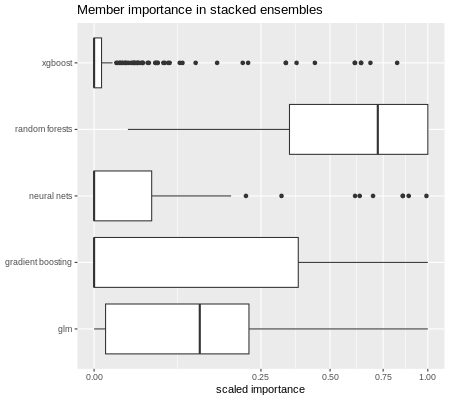

In [148]:
%%R -w 450 -h 400 -u px
auto_fit %>%
  extract_fit_parsnip() %>%
  member_weights() %>%
  unnest(importance) %>%
  filter(type == "scaled_importance") %>%
  ggplot() +
  geom_boxplot(aes(value, algorithm)) +
  scale_x_sqrt() +
  labs(y = NULL, x = "scaled importance", title = "Member importance in stacked ensembles")

We can also use **autoplot()** an AutoML object, which essentially wraps functions above to plot performance assessment and ranking. The lower the average ranking, the more likely the model type suits the data.

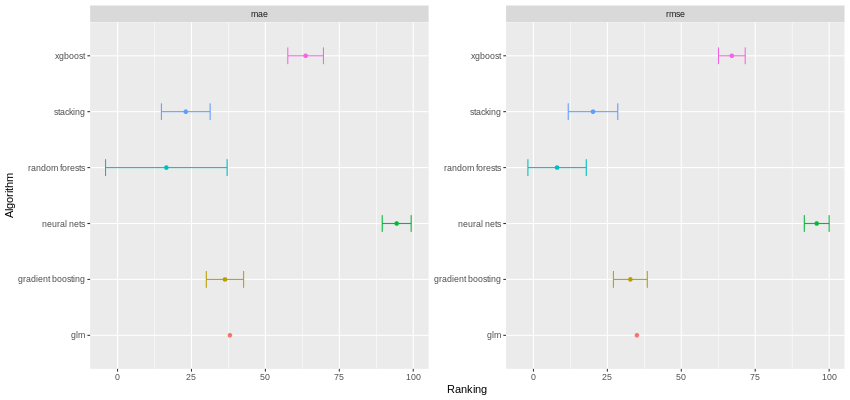

In [149]:
%%R -w 850 -h 400 -u px
autoplot(auto_fit, type = "rank", metric = c("mae", "rmse")) +
  theme(legend.position = "none")

### Predict with the best model

In [151]:
%%R
# predict with the best model
soc_pred <- predict(auto_fit, test) %>%
  bind_cols(test)

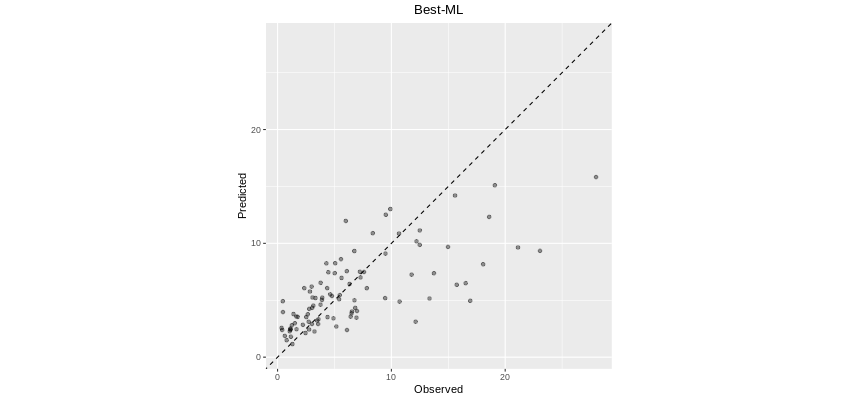

In [156]:
%%R -w 850 -h 400 -u px
ggplot(soc_pred, aes(x = SOC, y = .pred)) +
  geom_point(alpha = 0.4) +
  coord_obs_pred() +
  labs(x = "Observed", y = "Predicted") +
  geom_abline(linetype = "dashed") +
  ggtitle("Best-ML") +
  theme(plot.title = element_text(hjust = 0.5))

### Further Reading

1. [H2O AutoML: Automatic Machine Learning](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

2. [H20 AutoML with tydymodel](https://agua.tidymodels.org/articles/auto_ml.html)